# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/penguin.jpg" style="max-width:400px">

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin gender

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [53]:
%reset -f

## Imports

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import plot_tree

## Load the data

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [57]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#### What percentage are we dropping?

In [58]:
(df['sex'].isna().sum().sum() / len(df)) * 100

2.9069767441860463

In [59]:
df = df.dropna(subset='sex')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [61]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [62]:
df = df[df['sex']!='.']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [63]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Visualization

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

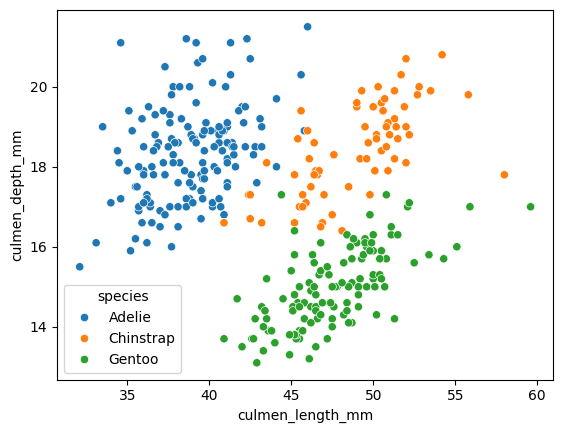

In [64]:
sns.scatterplot(df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

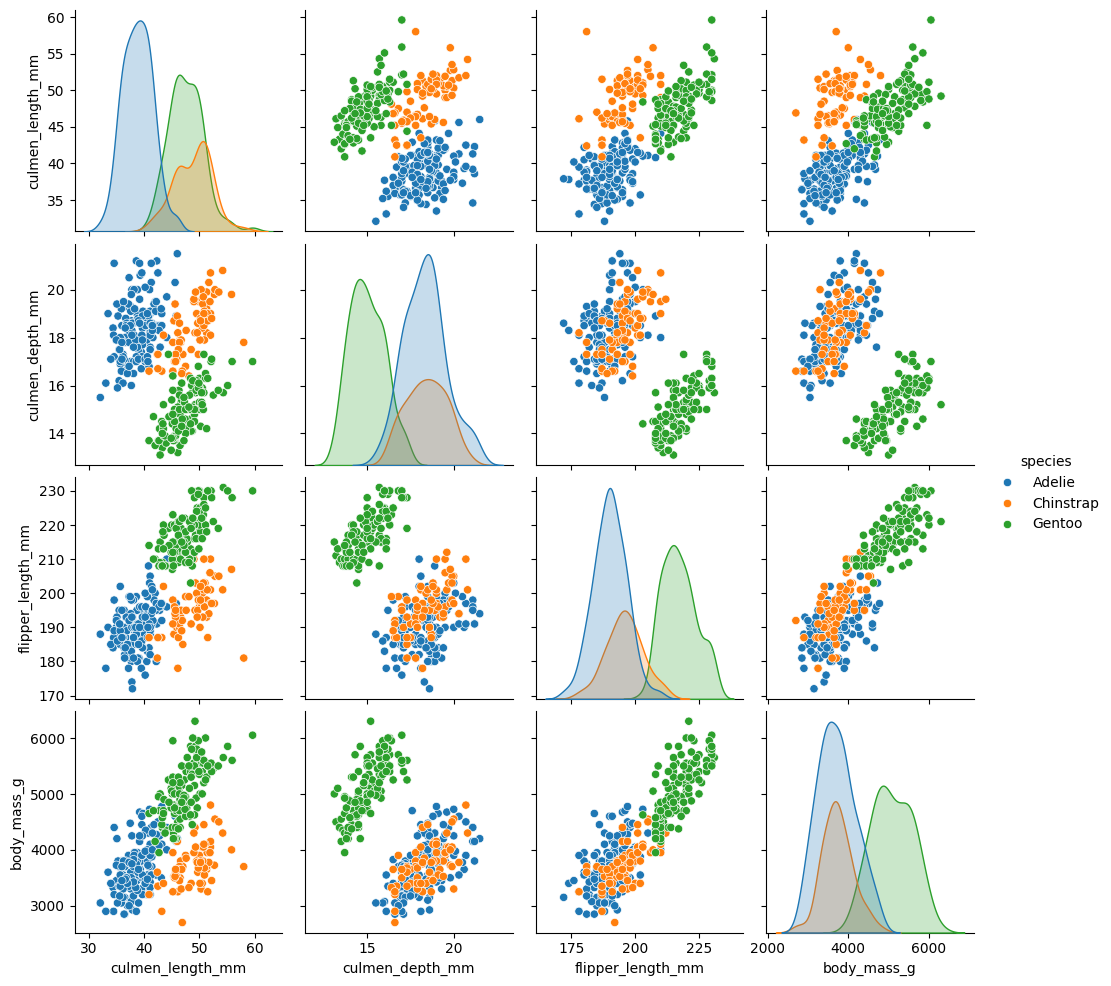

In [65]:
sns.pairplot(df, hue='species')

## Conclusions:
* We can see that Gento are the bigger species. They have the biggest body mass and culmen length, but they have the lowest culmen depth
* The body mass of the Chistrap and Adelie is basically the same, but they differ in culmen length - the Chinstraps have longer culmen.
* We can see that all the 4 features for all the 3 species are normally distributed which means that the data is good.

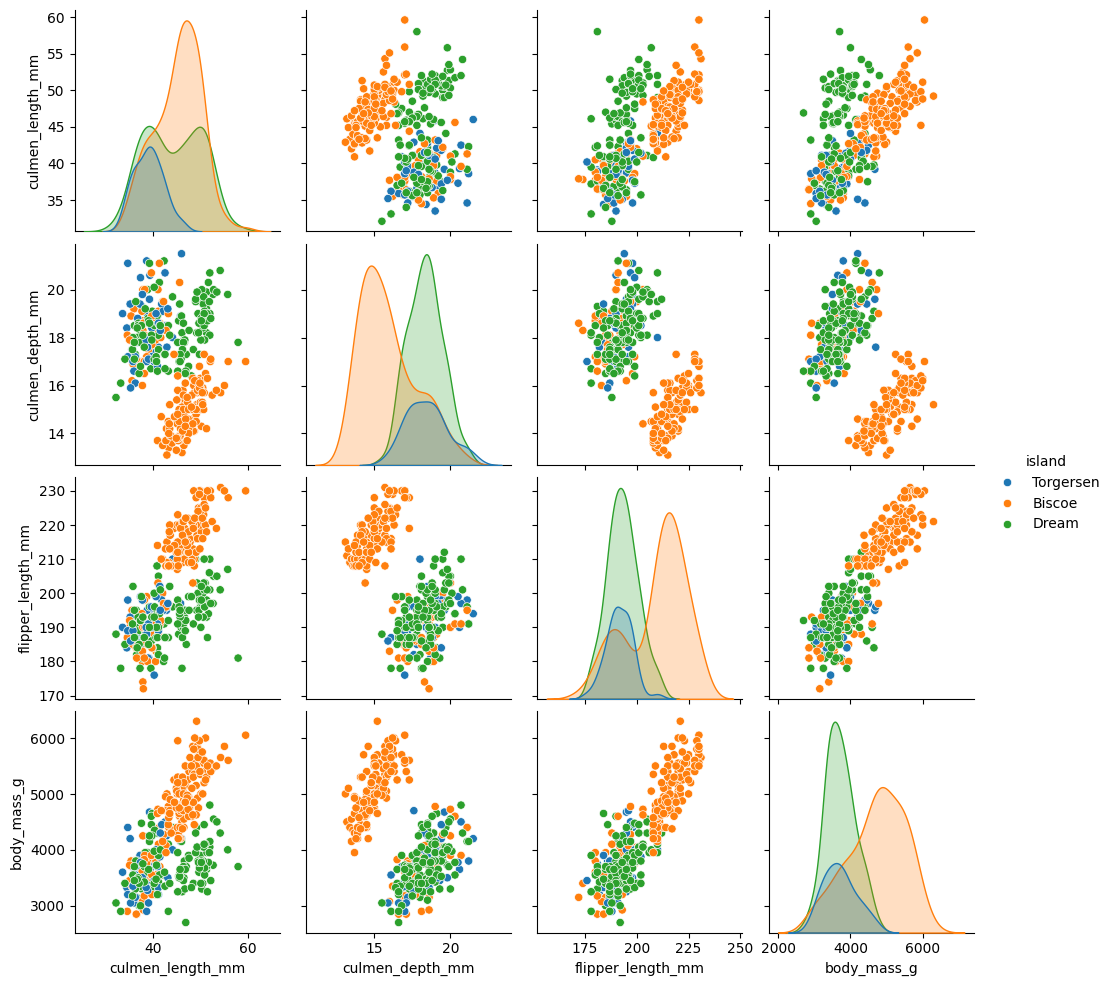

In [66]:
sns.pairplot(df, hue='island')

#### Conclusion:
* We can see that there is correlation between some of the variables and island as well.
* It is obvious that penguins living on Biscoe are generally bigger, while species that live on Tofrgersen and Dream are comparable in size.

<Axes: xlabel='species', ylabel='culmen_length_mm'>

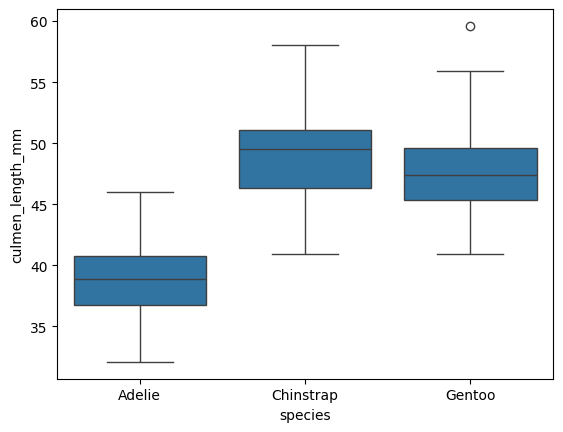

In [67]:
sns.boxplot(x='species', y='culmen_length_mm', data=df)

## Feature Engineering

In [68]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


## Train | Test Split

In [69]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [70]:
y = df['species']
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [77]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [78]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
predictions = dtc.predict(X_test)
predictions

array(['Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adeli

## Evaluation

In [80]:
confusion_matrix(y_test, predictions)

array([[38,  2,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]])

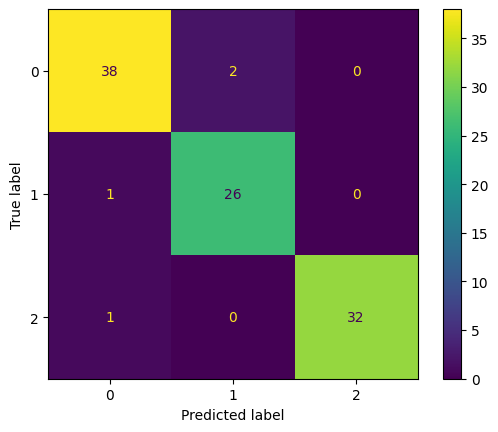

In [82]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions)).plot()

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [87]:
dtc.feature_importances_

array([0.33350103, 0.02010577, 0.57575804, 0.        , 0.03806069,
       0.00685778, 0.02571668])

## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

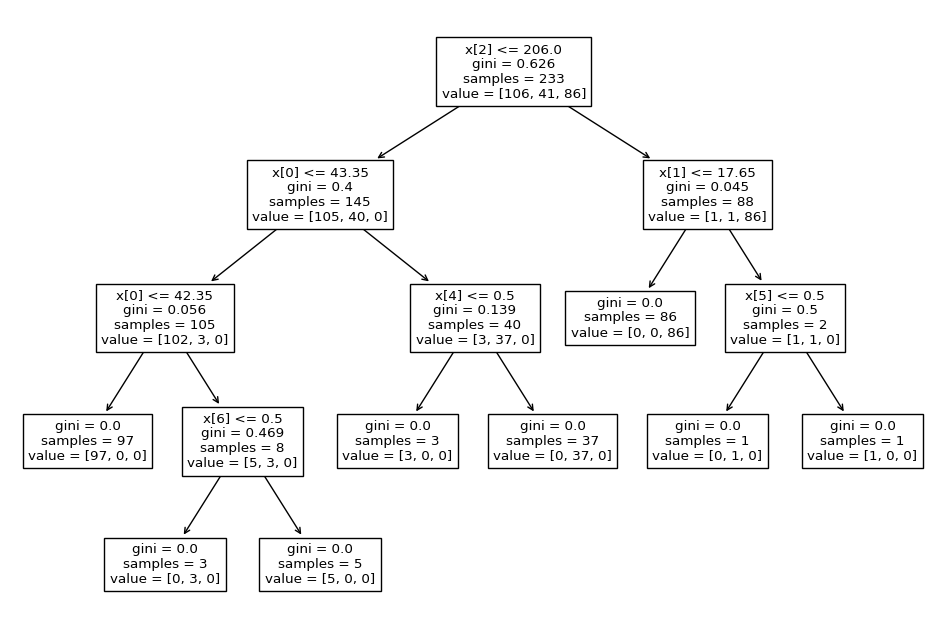

In [91]:
plt.figure(figsize=(12,8))
plot_tree(dtc);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [92]:
def report_model(model):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

### Max Depth

In [93]:
max_depth3_tree = DecisionTreeClassifier(max_depth=3)
max_depth3_tree

DecisionTreeClassifier(max_depth=3)

In [95]:
max_depth3_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.89      0.97      0.93        40
   Chinstrap       0.96      0.85      0.90        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100





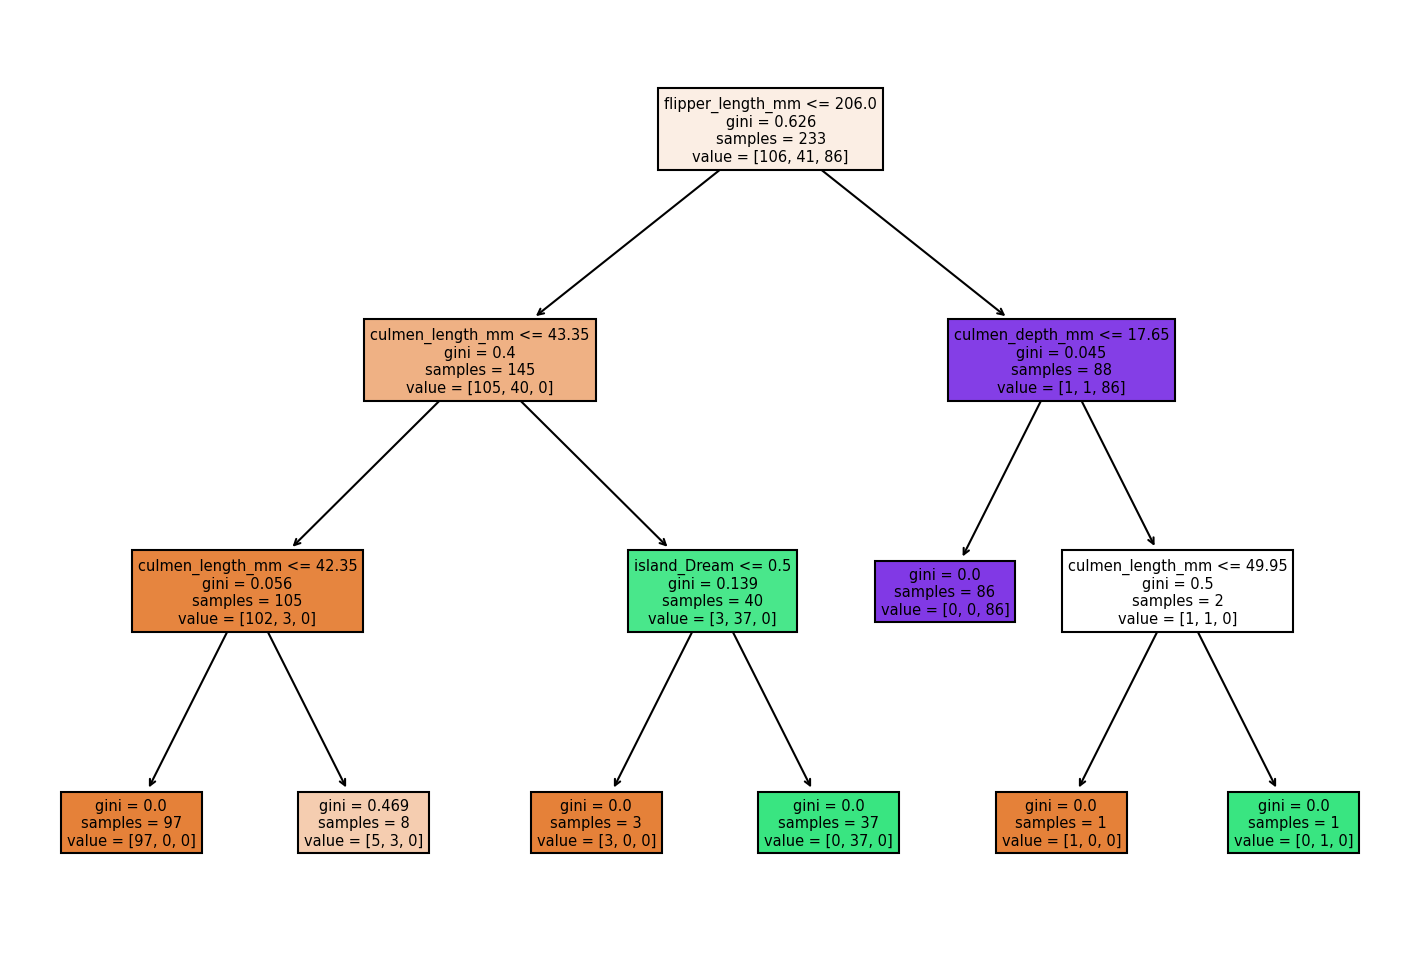

In [96]:
report_model(max_depth3_tree)

## Max Leaf Nodes

In [97]:
max_leaf3_tree = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf3_tree

DecisionTreeClassifier(max_leaf_nodes=3)

In [98]:
max_leaf3_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





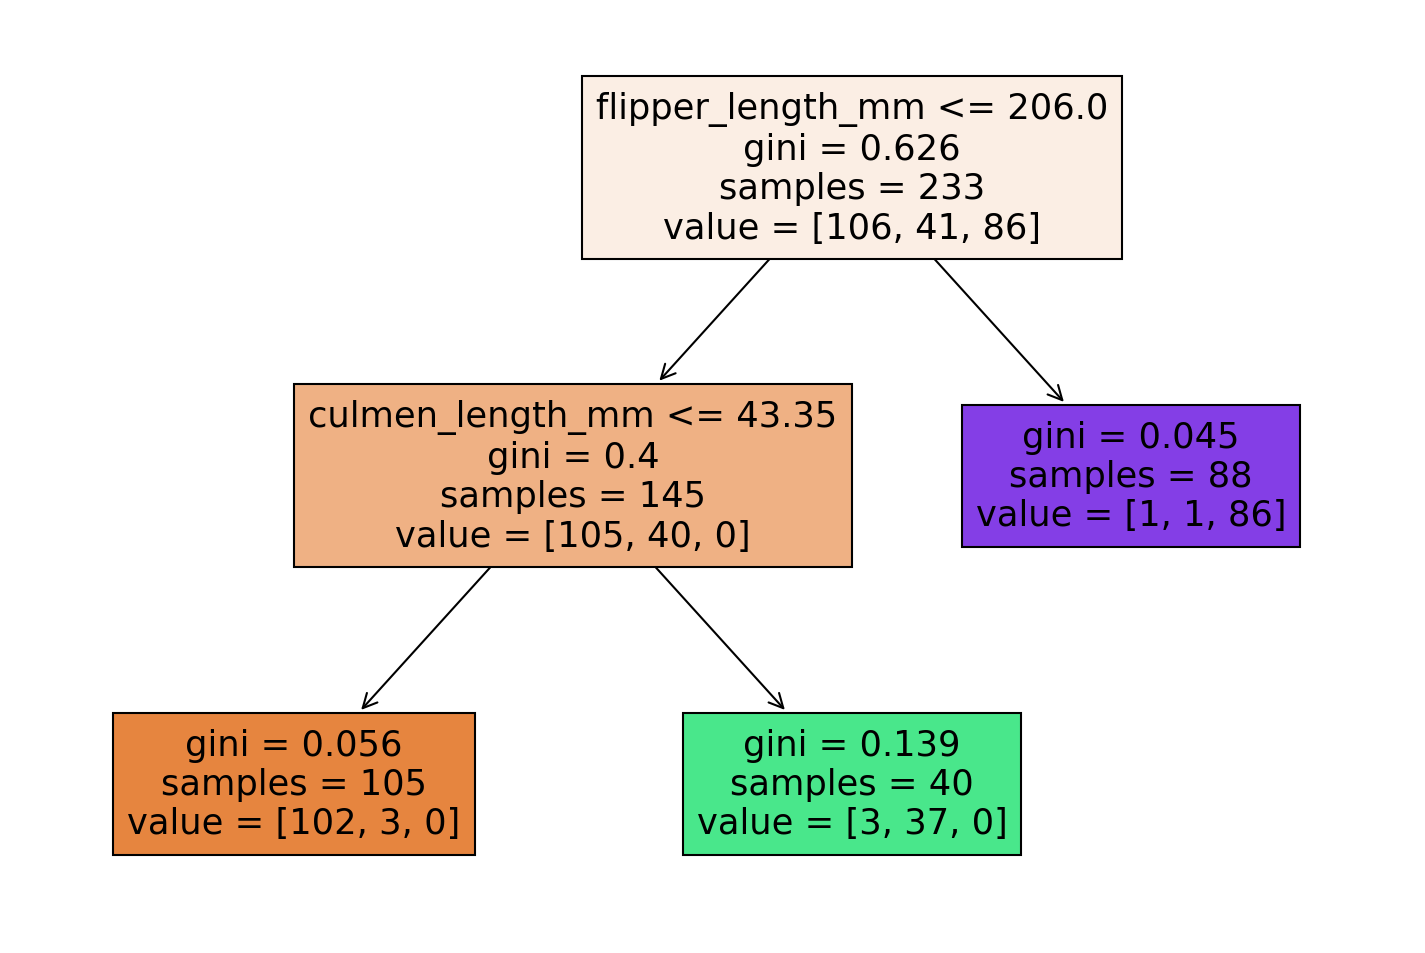

In [99]:
report_model(max_leaf3_tree)

## Criterion

In [100]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree

DecisionTreeClassifier(criterion='entropy')

In [101]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





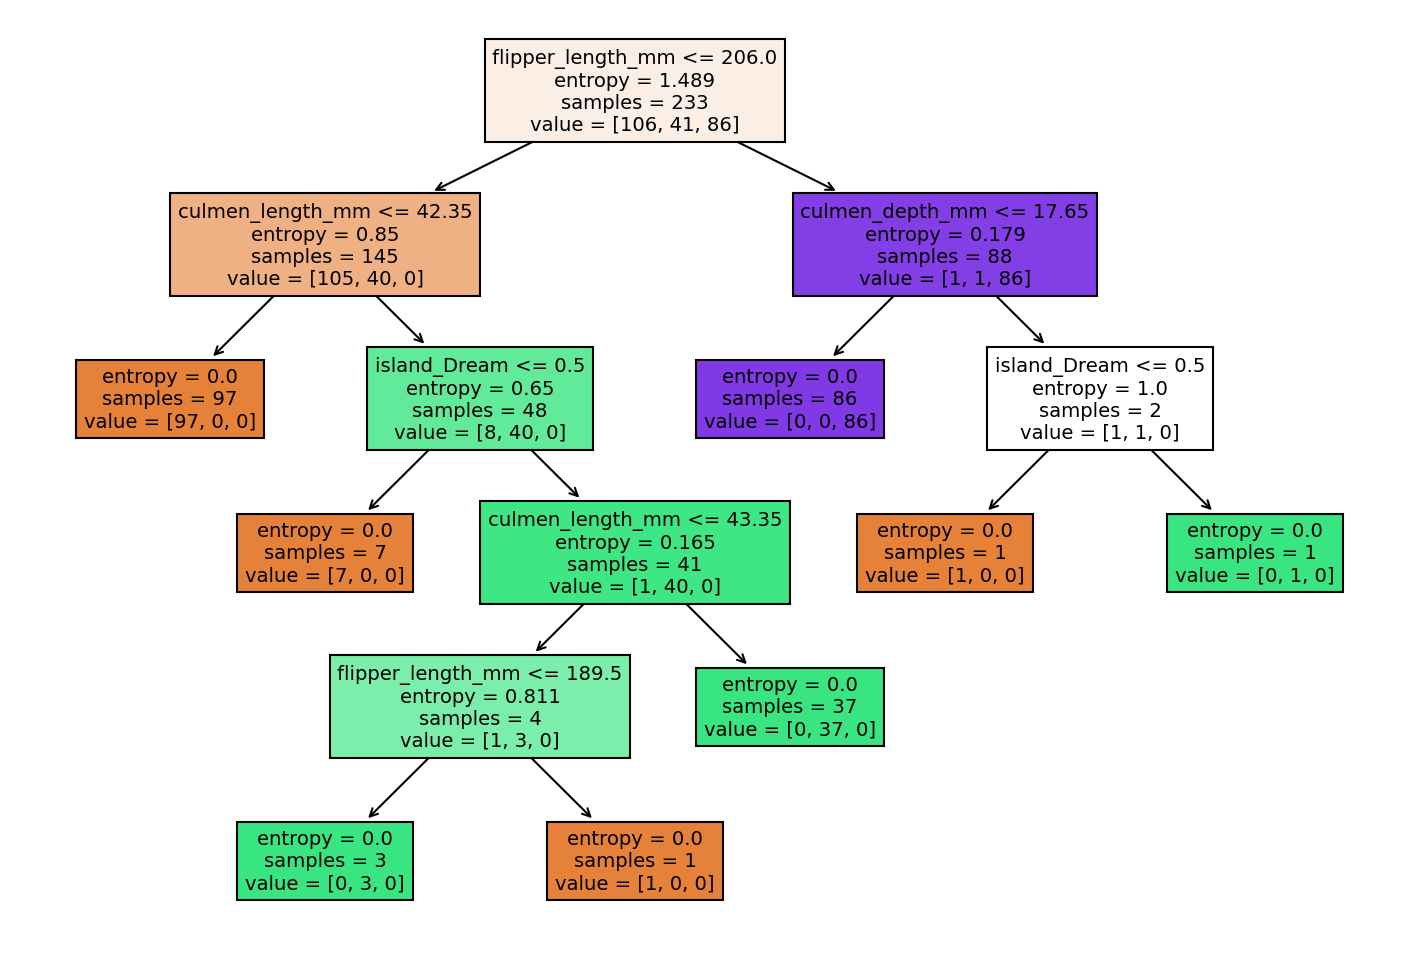

In [104]:
report_model(entropy_tree)

In [106]:
gini_tree = DecisionTreeClassifier(criterion='gini')
gini_tree

DecisionTreeClassifier()

In [107]:
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





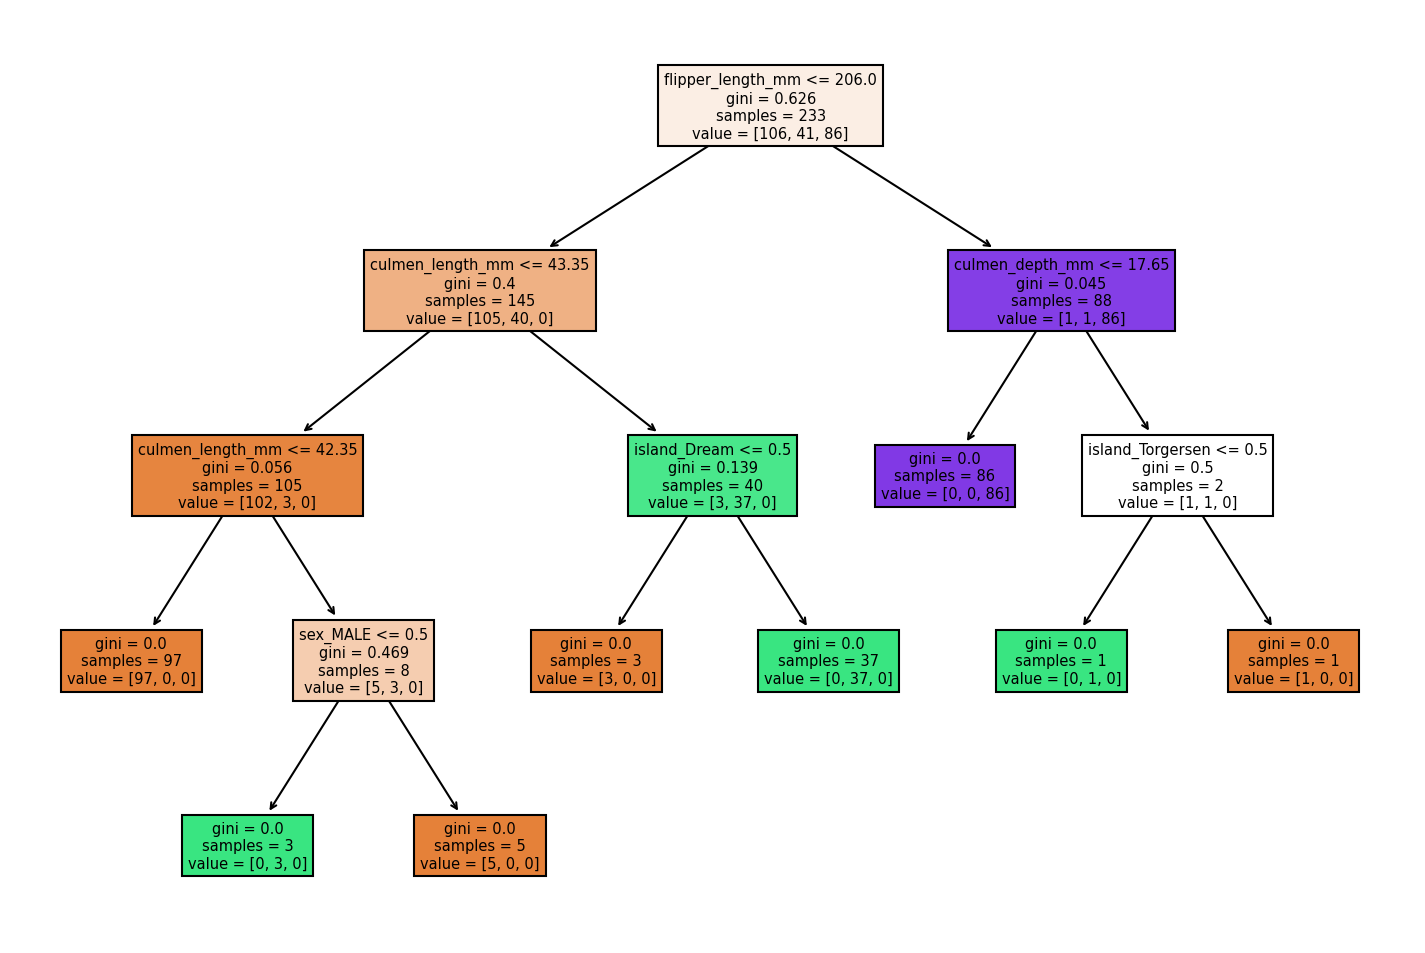

In [108]:
report_model(gini_tree)